In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wimprates
import os

import thesis_plots
from thesis_plots import mathrm
from thesis_plots.recoil_rates import nu, LimitSetter, LZ

# Make plots in preferred style using latex, but can safely be disabled
thesis_plots.setup_plt()

# Set limits
For this we need two things:
 - a detector with some exposure, detector response (efficiency x ROI)
 - a model of the expected wimp rates

In [2]:
detector = LZ()
halo_model = wimprates.StandardHaloModel(v_0=238*nu.km/nu.s)

In [3]:
limit_setter = LimitSetter(detector=detector, halo_model=halo_model)

To obtain the rates, we need some settings like which masses to compute. 

On github actions, we check that we can run this notebook, but that doesn't require spending a lot of time so we decrease our requirements then.


In [4]:
if os.environ.get('PLOT_FAST', False):
    mass_range = np.logspace(np.log10(5), np.log10(200), 5)
    limit_kw=dict(n_sigma_bins=5, log_sigma_range=(-48, -43))
else:
    mass_range = np.logspace(np.log10(5), np.log10(1000), 100)
    limit_kw=dict(n_sigma_bins=50, log_sigma_range=(-48, -43))

In [5]:
limit = limit_setter.set_limits(mass_range = mass_range, **limit_kw)

Getting limit for masses:   0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
# halo_model_up = wimprates.StandardHaloModel(v_0=(238+15)*nu.km/nu.s)
# halo_model_down = wimprates.StandardHaloModel(v_0=(238-15)*nu.km/nu.s)
# limit_up = LimitSetter(detector=detector, halo_model=halo_model_up).set_limits(mass_range = mass_range, **limit_kw)
# limit_down = LimitSetter(detector=detector, halo_model=halo_model_down).set_limits(mass_range = mass_range, **limit_kw)

In [7]:
alt_model = wimprates.StandardHaloModel(v_0=220*nu.km/nu.s)
limit_setter_alt = LimitSetter(
    detector=detector, 
    halo_model=alt_model
)

In [8]:
limit_alt = limit_setter_alt.set_limits(mass_range=mass_range,  **limit_kw)

Getting limit for masses:   0%|          | 0/100 [00:00<?, ?it/s]

Load the LZ limit from their released data as reference

In [9]:
lz_limit = pd.read_table(
    os.path.join(thesis_plots.root_folder, 'data', 'lz_limit', 'Fig5_SpinIndependentLimitandSensitivity.txt'),
    delimiter=' '
)

Plot the limit!

In [14]:
%run ../thesis_plots/main.py

In [16]:
setup_plt()

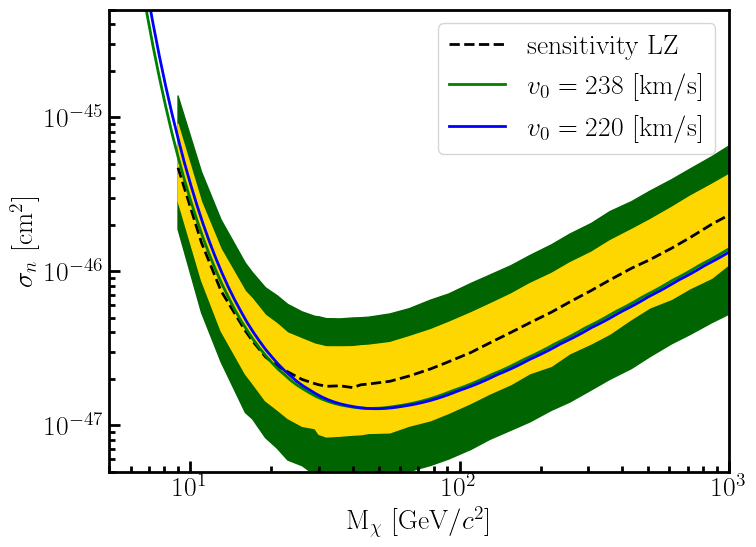

In [17]:
kw = dict()
plt.figure(figsize=(8,6))
plt.plot(lz_limit['mass(GeV)'],
         lz_limit['median'], 
         label=mathrm('sensitivity LZ'), 
         ls='--', 
         c='k',
         **kw,
        )
# plt.plot(lz_limit['mass(GeV)'],
#          lz_limit['limit(cm2)'], 
#          label=mathrm('limit LZ'), 
#          ls='--', 
#          **kw,
#         )
plt.fill_between(
    lz_limit['mass(GeV)'],
    lz_limit['-2sigma'],
    lz_limit['+2sigma'], 
    color='darkgreen'
)
plt.fill_between(
    lz_limit['mass(GeV)'],
    lz_limit['-1sigma'],
    lz_limit['+1sigma'], 
    color='gold'
)

plt.plot(mass_range, limit, label='$v_0=238\ [\mathrm{km/s}]$', **kw, c='green')
plt.plot(mass_range, limit_alt, label= '$v_0=220\ [\mathrm{km/s}]$', **kw,c='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\mathrm{M}_\chi\ [\mathrm{GeV}/c^2]$')
plt.ylabel('$\sigma_n\ [\mathrm{cm}^2]$')
plt.legend(ncol=1)
plt.ylim(5*10**-48, 5 * 10**-45)
plt.xlim(5, 1000)
thesis_plots.save_fig('limit_setting')

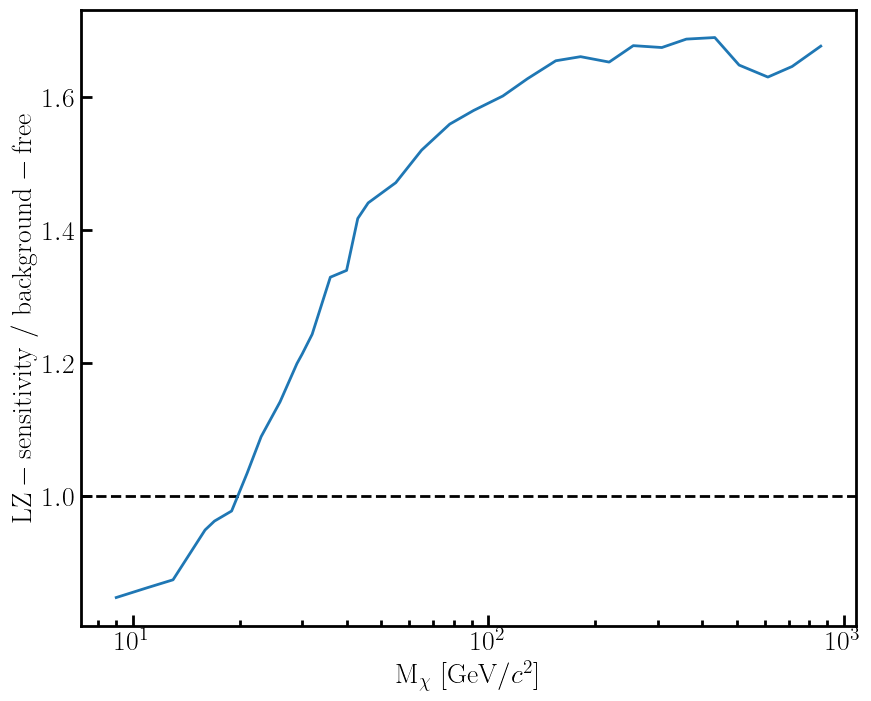

In [18]:
plt.axhline(1, ls='--', c='k')
itp = scipy.interpolate.interp1d(mass_range, limit, bounds_error=False)
plt.plot(lz_limit['mass(GeV)'], (lz_limit['median'])/(itp(lz_limit['mass(GeV)'])))
plt.ylabel(mathrm('LZ-sensitivity / background-free'))
plt.xlabel('$\mathrm{M}_\chi\ [\mathrm{GeV}/c^2]$')
plt.xscale('log')